In [25]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
stop = stopwords.words('english')

### Data Load 
Loading CSVs for each classifier.
- Abnormal Findings Classifier for Liver + Pancreas
- Disease Location Classifier for Liver + Pancreas
- Previous Surgeries Classifier for Liver + Pancreas

In [2]:
af_lp = pd.read_csv("Results/SVM_NB_Abnormal_Findings_LiverPancreas.csv")
dl_lp = pd.read_csv("Results/SVM_NB_Disease_loc_LiverPancreas.csv")
ps_lp = pd.read_csv("Results/SVM_NB_Previous_Surgeries_LiverPancreas.csv")

### Counting words

In [3]:
af_lp['Test Sentence new'] = af_lp['Test Sentence'].str.lower().str.replace('[^\w\s]','').apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
nu_df = af_lp['Test Sentence new'].str.split(expand=True).stack().value_counts().reset_index()
nu_df.columns = ['Word', 'Frequency']


<ipython-input-3-779e73f82052>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  af_lp['Test Sentence new'] = af_lp['Test Sentence'].str.lower().str.replace('[^\w\s]','').apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [4]:
words = nu_df['Word'][:48].tolist()

In [5]:
def word_count(string, freq_words_dic):
    sentence_words = string.split()
    
    for w in sentence_words:
        # if word in words dictionary
        if w in freq_words_dic:
            freq_words_dic[w] += 1
        # else, ignore
        else:
            continue
    return freq_words_dic

In [6]:
# now iterate through each row
list_dicts = []
for sentence in af_lp['Test Sentence']:
    words_dic = {w:0 for w in words}
    d = word_count(sentence, words_dic)
    list_dicts.append(d)

In [7]:
words_abfinds_liverpancreas = pd.DataFrame(list_dicts)

In [8]:
words_abfinds_liverpancreas['labels'] = af_lp['Labels']

In [9]:
# only present 
present = words_abfinds_liverpancreas[words_abfinds_liverpancreas['labels'] == 1]
#present.append(present.sum(numeric_only=True), ignore_index=True)
# only absent
absent = words_abfinds_liverpancreas[words_abfinds_liverpancreas['labels'] == 0]
#absent.append(absent.sum(numeric_only=True), ignore_index=True)

In [12]:
present = present.append(present.sum(numeric_only=True), ignore_index=True)
present

,pancreatic,cm,gallbladder,mass,duct,unremarkable,measuring,unchanged,dilatation,pneumobilia,...,atrophy,soft,tissue,hypodense,associated,celiac,stable,size,left,labels
0,0,4,0,2,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,0,0,2,1,0,0,0,1,0,...,1,1,1,0,0,1,0,0,0,1
2,4,0,0,0,1,0,1,0,1,0,...,0,1,1,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4,3,1,0,2,1,0,1,0,1,0,...,1,1,1,0,0,1,0,0,0,1
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,2,1
7,2,1,0,3,2,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
8,2,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
9,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
absent = absent.append(absent.sum(numeric_only=True), ignore_index=True)
absent

,pancreatic,cm,gallbladder,mass,duct,unremarkable,measuring,unchanged,dilatation,pneumobilia,...,atrophy,soft,tissue,hypodense,associated,celiac,stable,size,left,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3,0,3,1,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
mass_total_present = present['mass'].tolist()[-1]
cm_total_present = present['cm'].tolist()[-1]
unremarkable_total_present = present['unremarkable'].tolist()[-1]
illdefined_total_present = present['illdefined'].tolist()[-1]
lesion_total_present = present['lesion'].tolist()[-1]
absent_total_present = present['absent'].tolist()[-1]
mm_total_present = present['mm'].tolist()[-1]
size_total_present = present['size'].tolist()[-1]

mass_total_absent = absent['mass'].tolist()[-1]
cm_total_absent = absent['cm'].tolist()[-1]
unremarkable_total_absent = absent['unremarkable'].tolist()[-1]
illdefined_total_absent = absent['illdefined'].tolist()[-1]
lesion_total_absent = absent['lesion'].tolist()[-1]
absent_total_absent = absent['absent'].tolist()[-1]
mm_total_absent = absent['mm'].tolist()[-1]
size_total_absent = absent['size'].tolist()[-1]

In [33]:
lesion_total_absent

1

In [34]:
lesion_total_present

10

In [ ]:
# mass, cm, unremarkable, measuring, illdefined, lesion, absent, pancreas, liver, mm, size

In [14]:
nu_df.iloc[:60] #mass, cm, duct, measuring, dilatation, illdefined, absent, lesion, pancreas, liver, hepatic, pancreatic, gallbladder, atrophy, surgically, size

,Word,Frequency
0,pancreatic,59
1,cm,38
2,gallbladder,38
3,mass,38
4,duct,27
5,unremarkable,26
6,measuring,23
7,unchanged,21
8,dilatation,19
9,pneumobilia,19


### FET

mass and cm

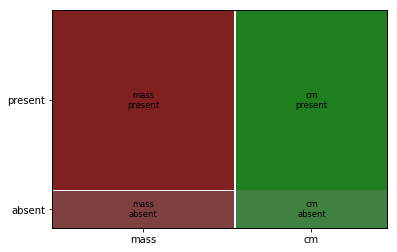

In [26]:
from statsmodels.graphics.mosaicplot import mosaic
df_dict1 = {('mass','absent'):6, ('mass', 'present'):29, ('cm', 'absent'):5, ('cm', 'present'):24}
mosaic(df_dict1)
plt.show()

In [27]:
from scipy.stats import fisher_exact
df1 = pd.DataFrame({'mass':[6, 29], 'cm':[5,24]}, index = pd.Index(['absent', 'present']))
oddsr, p = fisher_exact(table = df1.to_numpy(), alternative='two-sided')
oddsr, p

(0.993103448275862, 1.0)

mass and unremarkable

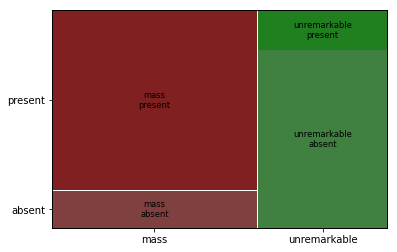

In [31]:
df_dict2 = {('mass','absent'):6, ('mass', 'present'):29, ('unremarkable', 'absent'):18, ('unremarkable', 'present'):4}
mosaic(df_dict2)
plt.show()

In [32]:
df2 = pd.DataFrame({'mass':[6, 29], 'unremarkalble':[18,4]}, index = pd.Index(['absent', 'present']))
oddsr, p = fisher_exact(table = df2.to_numpy(), alternative='two-sided')
oddsr, p

(0.04597701149425287, 1.7019751328630308e-06)

mm and lesion

In [38]:
mm_total_absent

0

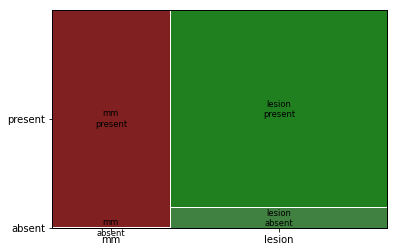

In [39]:
df_dict3 = {('mm','absent'):0, ('mm', 'present'):6, ('lesion', 'absent'):1, ('lesion', 'present'):10}
mosaic(df_dict3)
plt.show()

In [40]:
df3 = pd.DataFrame({'mm':[0, 6], 'lession':[1,10]}, index = pd.Index(['absent', 'present']))
oddsr, p = fisher_exact(table = df3.to_numpy(), alternative='two-sided')
oddsr, p

(0.0, 1.0)